In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("training_data.csv")
df.head()

,author,description,label,publishedAt,title
0,Julia Reinstein,"Trust no man, trust no brand. (This post will ...",1,NaN,The Definitive Guide To The Best April Fools’ ...
1,Natalya Lobanova,Not that anyone should need convincing of thei...,1,NaN,Literally Just 19 Pictures That Prove Hedgehog...
2,"Kat Angus, Jane Lytvynenko","You can only have one, eh?",1,NaN,"""Would You Rather"": Canadian Food Vs. Canadian..."
3,Ben Coleman,"""It's gonna rip my eyebrow off!""",1,NaN,"Guys Try The ""Most Painful"" Face Mask"
4,Ellie Bate,"No, your hair colour won't make a difference.",1,NaN,"Which ""Riverdale"" Family Do You Belong In?"


### 0 = Not ClickBait 1 = ClickBait

In [3]:
df.publishedAt.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: publishedAt, dtype: object

In [4]:
df["label"].value_counts()

0    808
1    557
Name: label, dtype: int64

In [5]:
df["author"].isnull().value_counts()

False    907
True     458
Name: author, dtype: int64

In [6]:
df["description"].apply(len).mean()

85.32307692307693

In [7]:
df["description"].apply(len).groupby(df["label"]).mean()

label
0    111.623762
1     47.170557
Name: description, dtype: float64

###dlasjdlajsdljsa

In [8]:
df["Whole"] = df.description + " " + df.title

In [9]:
df["Whole"][0]


'Trust no man, trust no brand. (This post will be updated throughout the day.) The Definitive Guide To The Best April Fools’ Day Pranks On The Internet In 2017'

In [10]:
df.head()

,author,description,label,publishedAt,title,Whole
0,Julia Reinstein,"Trust no man, trust no brand. (This post will ...",1,NaN,The Definitive Guide To The Best April Fools’ ...,"Trust no man, trust no brand. (This post will ..."
1,Natalya Lobanova,Not that anyone should need convincing of thei...,1,NaN,Literally Just 19 Pictures That Prove Hedgehog...,Not that anyone should need convincing of thei...
2,"Kat Angus, Jane Lytvynenko","You can only have one, eh?",1,NaN,"""Would You Rather"": Canadian Food Vs. Canadian...","You can only have one, eh? ""Would You Rather"":..."
3,Ben Coleman,"""It's gonna rip my eyebrow off!""",1,NaN,"Guys Try The ""Most Painful"" Face Mask","""It's gonna rip my eyebrow off!"" Guys Try The ..."
4,Ellie Bate,"No, your hair colour won't make a difference.",1,NaN,"Which ""Riverdale"" Family Do You Belong In?","No, your hair colour won't make a difference. ..."


In [11]:
#Counting the number of click baits
df.label.value_counts()

0    808
1    557
Name: label, dtype: int64

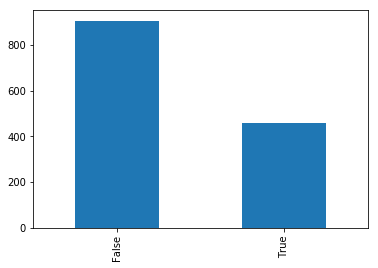

In [12]:
df["author"].isnull().value_counts().plot("bar")

In [13]:
df["description"].apply(len).groupby(df["label"]).mean()

label
0    111.623762
1     47.170557
Name: description, dtype: float64

In [14]:
#the total number of articles that are clickbait
len(df["label"] == 1)

1365

In [15]:
df["description"].apply(len).mean()

85.32307692307693

## Counting the number of words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cvec = CountVectorizer()

In [20]:
test1 = ["My engilish is not good. I need to improve my english."]
cvec.fit(test1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
cvec.vocabulary_

{'my': 5,
 'engilish': 0,
 'is': 4,
 'not': 7,
 'good': 2,
 'need': 6,
 'to': 8,
 'improve': 3,
 'english': 1}

In [24]:
cvec.transform(test1).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [25]:
test2 = ["You have won a lottery of $500000. You have not won at all."]
cvec.fit(test2)
# cvec.vocabulary_
cvec.transform(test2).toarray()

array([[1, 1, 1, 2, 1, 1, 1, 2, 2]])

# Using the Logistic Regression Classifier

In [73]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [74]:
df

,author,description,label,publishedAt,title,Whole
0,Julia Reinstein,"Trust no man, trust no brand. (This post will ...",1,NaN,The Definitive Guide To The Best April Fools’ ...,"Trust no man, trust no brand. (This post will ..."
1,Natalya Lobanova,Not that anyone should need convincing of thei...,1,NaN,Literally Just 19 Pictures That Prove Hedgehog...,Not that anyone should need convincing of thei...
2,"Kat Angus, Jane Lytvynenko","You can only have one, eh?",1,NaN,"""Would You Rather"": Canadian Food Vs. Canadian...","You can only have one, eh? ""Would You Rather"":..."
3,Ben Coleman,"""It's gonna rip my eyebrow off!""",1,NaN,"Guys Try The ""Most Painful"" Face Mask","""It's gonna rip my eyebrow off!"" Guys Try The ..."
4,Ellie Bate,"No, your hair colour won't make a difference.",1,NaN,"Which ""Riverdale"" Family Do You Belong In?","No, your hair colour won't make a difference. ..."
5,Beatriz Serrano,These painters get it.,1,NaN,27 Times Art History Totally Captured What It'...,These painters get it. 27 Times Art History To...
6,Sarah Aspler,"This week: Herb infusers, hands-free umbrellas...",1,NaN,15 Cool Products Canadians Are Buying On Amazo...,"This week: Herb infusers, hands-free umbrellas..."
7,Jamie Jones,Step back in time.,1,NaN,Relive The '00s And We'll Guess Your Exact Age...,Step back in time. Relive The '00s And We'll G...
8,Brian Galindo,"""I have a return, but I don't have the tags or...",1,NaN,24 Tweets That'll Really Speak To Every Retail...,"""I have a return, but I don't have the tags or..."
9,Joshua M. Ferguson,"On the Trans Day of Visibility, we need to tal...",1,2017-03-31T17:43:55Z,I Imagine A Time When You See Me,"On the Trans Day of Visibility, we need to tal..."


In [75]:
train_x, test_x, train_y, test_y = train_test_split(df.Whole, df.label)

## Count Vectorizer

In [85]:
cvec = CountVectorizer(stop_words="english")
cvec_trainX = cvec.fit_transform(train_x)
cvec_testX = cvec.transform(test_x)

## Now, Logistic Regression

In [86]:
logreg = LogisticRegression()
logreg = logreg.fit(cvec_trainX,train_y)

/home/prajwol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
accuracy = cross_val_score(logreg,cvec_testX,test_y,cv=5)
accuracy.mean()

/home/prajwol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9094117647058824

In [110]:
chk = [input()]
# chk = cvec.transform(chk)
output = logreg.predict(cvec.transform(chk))


i am good.


In [111]:
output[0]

1